In [1]:
# Task - Household Power Consumption Analysis with ARIMA & XGBoost

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv("Household_power_consumption.csv")
print(df.head())
print(df.info())

              datetime  Global_active_power  Global_reactive_power  Voltage  \
0  2006-12-16 17:24:00                4.216                  0.418   234.84   
1  2006-12-16 17:25:00                5.360                  0.436   233.63   
2  2006-12-16 17:26:00                5.374                  0.498   233.29   
3  2006-12-16 17:27:00                5.388                  0.502   233.74   
4  2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0              18.4             0.0             1.0            17.0   
1              23.0             0.0             1.0            16.0   
2              23.0             0.0             2.0            17.0   
3              23.0             0.0             1.0            17.0   
4              15.8             0.0             1.0            17.0   

   sub_metering_4  
0       52.266670  
1       72.333336  
2       70.566666  
3       71.800000 

In [3]:
# Step 3: Convert datetime & set as index
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

In [4]:
# Step 4: Handle missing values
df = df.fillna(method='ffill')

# Step 5: Dataset overview
print(df.head())
print(df.info())

                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

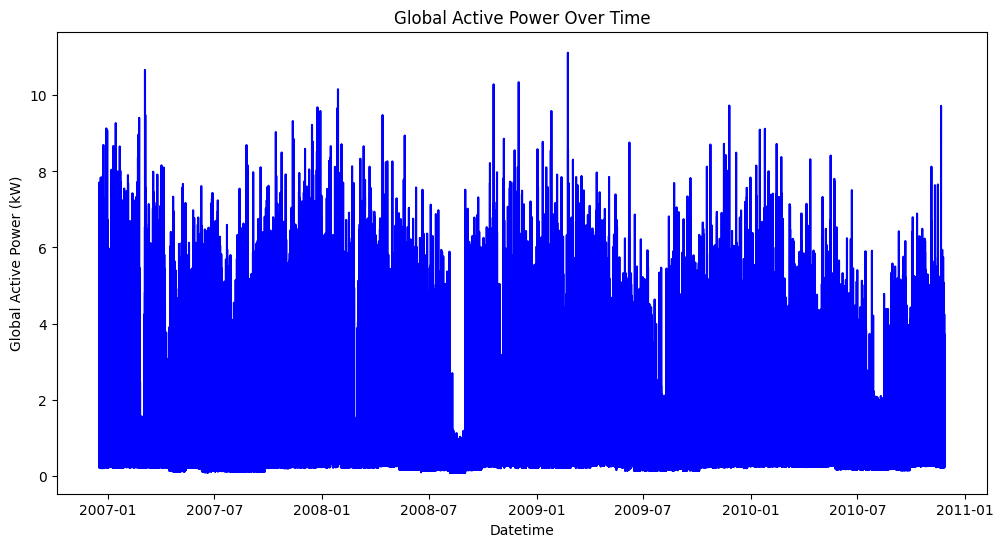

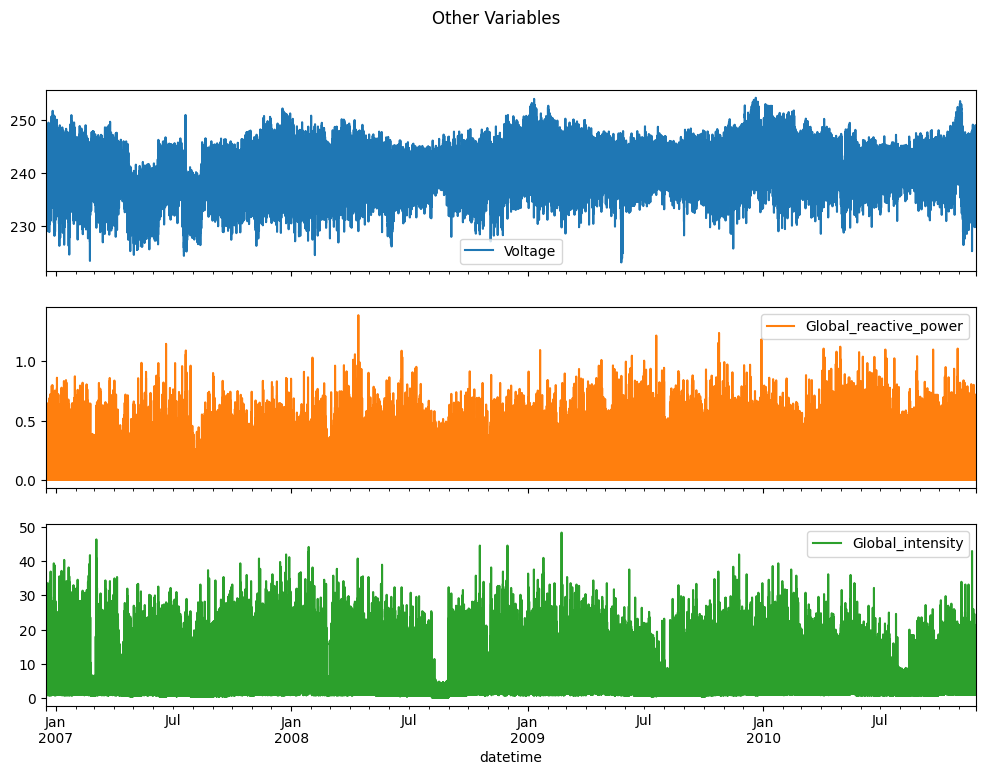

In [5]:
# Step 6: Visualization - Global Active Power over time
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Global_active_power'], color='blue')
plt.title("Global Active Power Over Time")
plt.xlabel("Datetime")
plt.ylabel("Global Active Power (kW)")
plt.show()

# Subplots for other variables
df[['Voltage','Global_reactive_power','Global_intensity']].plot(subplots=True, figsize=(12,8), title="Other Variables")
plt.show()


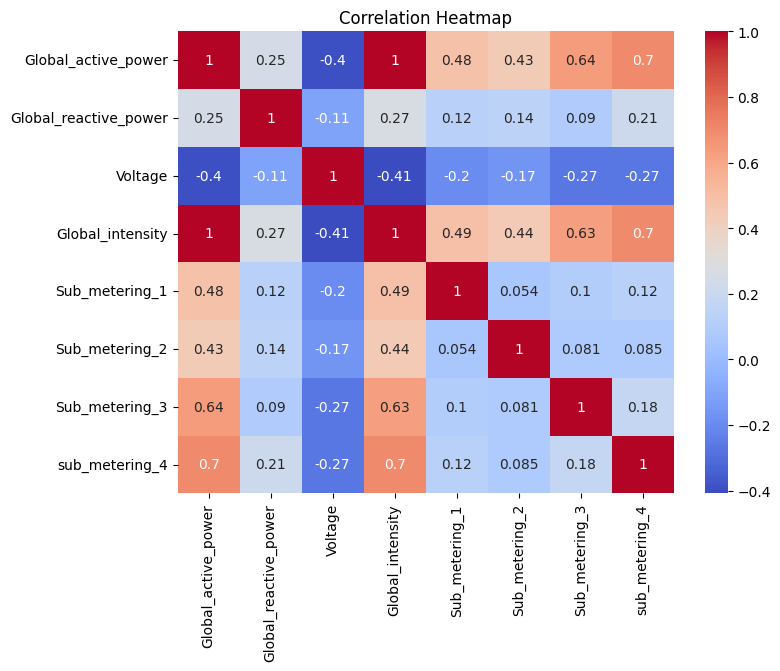

In [6]:
# Step 7: Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

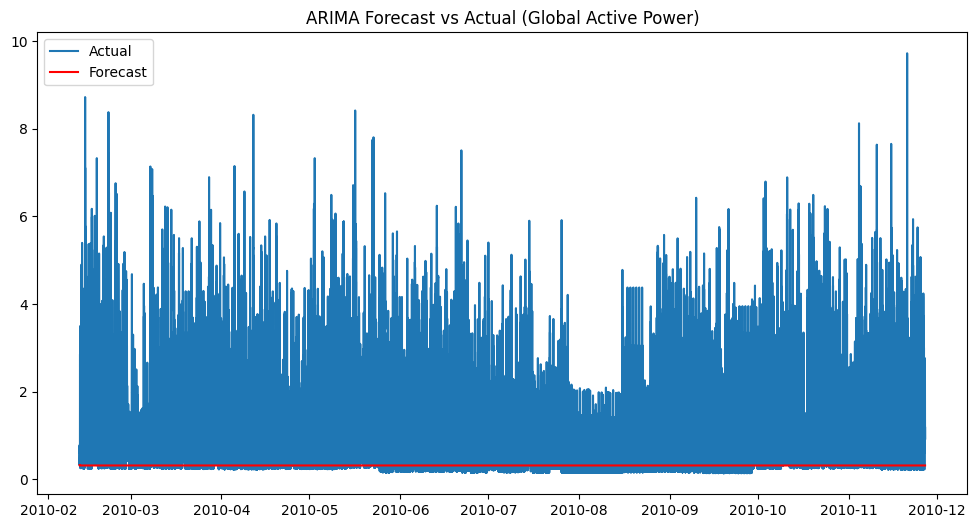

In [7]:
# Step 8: ARIMA Forecasting (on Global_active_power)
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
ts = df['Global_active_power']

train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

model_arima = ARIMA(train, order=(5,1,0))
model_fit = model_arima.fit()

forecast = model_fit.forecast(steps=len(test))

# Evaluation ARIMA
mae_arima = mean_absolute_error(test, forecast)
rmse_arima = np.sqrt(mean_squared_error(test, forecast))

plt.figure(figsize=(12,6))
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, forecast, label="Forecast", color='red')
plt.legend()
plt.title("ARIMA Forecast vs Actual (Global Active Power)")
plt.show()

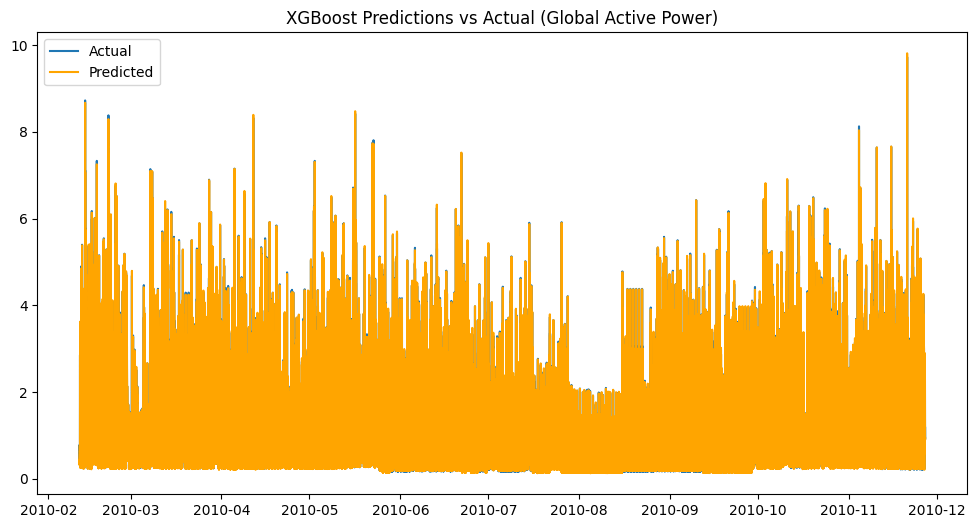

In [10]:
# Step 9: XGBoost Regression
X = df.drop("Global_active_power", axis=1)
y = df["Global_active_power"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

# Evaluation XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgb = r2_score(y_test, y_pred)

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Predicted", color='orange')
plt.legend()
plt.title("XGBoost Predictions vs Actual (Global Active Power)")
plt.show()

In [11]:
# Step 10: Comparison table
results = pd.DataFrame({
    "Model": ["ARIMA", "XGBoost"],
    "MAE": [mae_arima, mae_xgb],
    "RMSE": [rmse_arima, rmse_xgb],
    "R2": ["-", r2_xgb]  # R² only for XGBoost
})

print("\nModel Performance Comparison:")
print(results)


Model Performance Comparison:
     Model       MAE      RMSE        R2
0    ARIMA  0.718091  1.117725         -
1  XGBoost  0.015598  0.026778  0.999079


In [12]:
# Step 11: Conclusion
print("\nConclusion:")
if rmse_xgb < rmse_arima:
    print("XGBoost performed better than ARIMA for predicting Global Active Power.")
else:
    print("ARIMA performed better than XGBoost for this dataset.")


Conclusion:
XGBoost performed better than ARIMA for predicting Global Active Power.
